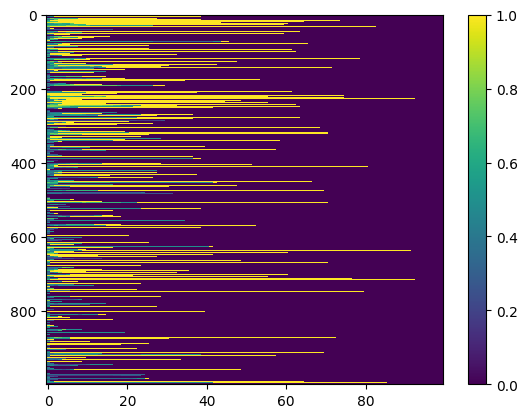

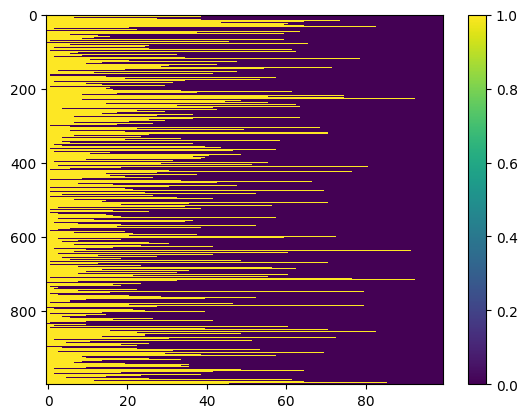

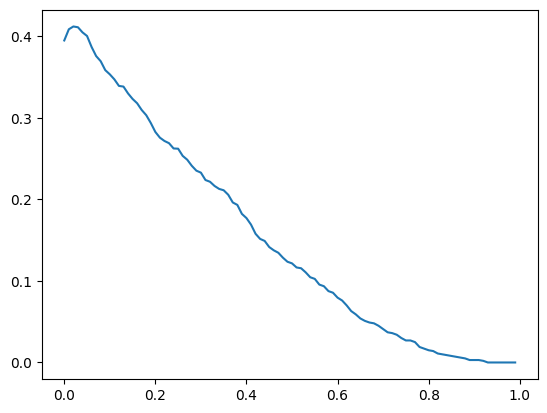

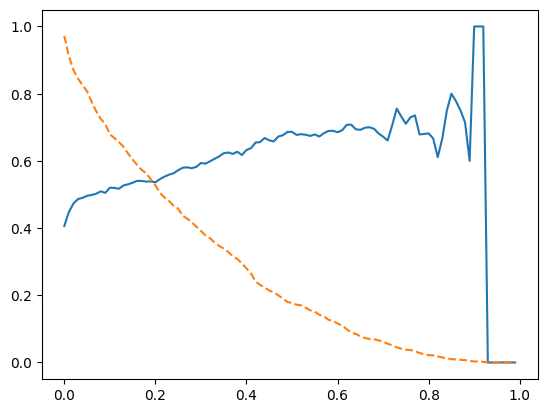

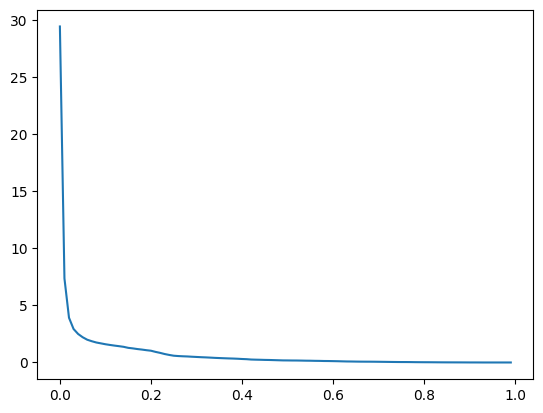

In [43]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load the files from the SVX_accuracy_save directory
threshold = np.load('/home/tomas/desktop/flib/thesis_XAML/SVX_accuracy_save/threshold.npy')
n_sus_neighbours = np.load('/home/tomas/desktop/flib/thesis_XAML/SVX_accuracy_save/n_sus_neighbours.npy')
SVX_accuracy = np.load('/home/tomas/desktop/flib/thesis_XAML/SVX_accuracy_save/SVX_accuracy.npy')
thresh_stop = np.load('/home/tomas/desktop/flib/thesis_XAML/SVX_accuracy_save/thresh_stop.npy')

thresh_interval = [0,100]
n_samples = 1000
threshold = threshold[thresh_interval[0]:thresh_interval[1]]
SVX_accuracy = SVX_accuracy[:n_samples,thresh_interval[0]:thresh_interval[1]]
n_sus_neighbours = n_sus_neighbours[:n_samples,thresh_interval[0]:thresh_interval[1]]


plt.figure()
plt.imshow(SVX_accuracy, interpolation='nearest', aspect='auto')
plt.colorbar()

plt.figure()
plt.imshow(n_sus_neighbours > 0, interpolation='nearest', aspect='auto')
plt.colorbar()

mean_SVX_accuracy = np.mean(SVX_accuracy, axis = 0)
plt.figure()
plt.plot(threshold, mean_SVX_accuracy)

adjusted_mean_SVX_accuracy = np.zeros(len(threshold))
adjusted_count = np.zeros(len(threshold))
for i in range(len(threshold)):
    tmp_mean = np.mean(SVX_accuracy[n_sus_neighbours[:,i] > 0,i])
    if tmp_mean > 0:
        adjusted_mean_SVX_accuracy[i] = tmp_mean # Mean of accuracy for those with at least one neighbour with shapley value > thresh
    adjusted_count[i] = np.sum(n_sus_neighbours[:,i] > 0)/n_samples # Percentage of nodes with at least one neighbour with shapley value > thresh
plt.figure()
plt.plot(threshold, adjusted_mean_SVX_accuracy)
plt.plot(threshold, adjusted_count, linestyle = '--')


mean_n_sus_neighbours = np.mean(n_sus_neighbours, axis = 0)
plt.figure()
plt.plot(threshold, mean_n_sus_neighbours)


# plt.figure()
# plt.plot(threshold, SVX_accuracy[3,:], label='1 neighbour')


# Continue with your code